# 전기차 충전소 현황조회 서비스

#### 주요기능
- 지역별 충전소 리스트 검색
- 지역별 충전소 현황 그래프 표시
- 충전소 정보 확인 (충전소 주소, 충전기 타입, 상태)
- 가상의 관리자와의 채팅을 통한 충전소 사용 예약
- 예약현황 확인/취소

#### 사용자료
- 한국전력공사 전기차충전소정보 조회 서비스 오픈API  
(https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=3068728)

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

### 1. 충전소 리스트 검색
#### 지역이름 받아서 리스트 출력 & 전체 수 표시

In [2]:
url = "http://openapi.kepco.co.kr/service/EvInfoServiceV2/getEvSearchList"
key = "1vpUi9jK%2B%2FJBVqaJ6TDWANcFxIFeuXBQRAljiZth0kzAvawz7gHoAgqwY3hDOFDi0SAcOe5Vz%2BE3ErfXvypDWw%3D%3D"

def get_root(page_no, num_row, area):
    html = requests.get(url+'?pageNo='+str(page_no)+'&numOfRows='+str(num_row)+'&ServiceKey='+key+'&addr='+area).text
    root = BeautifulSoup(html, 'lxml-xml')
    return root

get_root(1, 100, '')    

<?xml version="1.0" encoding="utf-8"?>
<response><header><resultCode>00</resultCode><resultMsg>NORMAL SERVICE.</resultMsg></header><body><items><item><addr>서울특별시 중구 남대문로 92 1층 주차장</addr><chargeTp>2</chargeTp><cpId>811</cpId><cpNm>급속01</cpNm><cpStat>1</cpStat><cpTp>10</cpTp><csId>14</csId><csNm>서울직할</csNm><lat>37.565199</lat><longi>126.983339</longi><statUpdateDatetime>2021-07-13 04:06:01</statUpdateDatetime></item><item><addr>경상남도 남해군 남해읍 심천리 955-1 정문 우측</addr><chargeTp>2</chargeTp><cpId>464</cpId><cpNm>급속01</cpNm><cpStat>3</cpStat><cpTp>10</cpTp><csId>75</csId><csNm>남해지사</csNm><lat>34.851325596758144</lat><longi>127.8942036494668</longi><statUpdateDatetime>2021-07-13 04:05:10</statUpdateDatetime></item><item><addr>서울특별시 한강대로 23길 55 4.5F층 달주차장</addr><chargeTp>2</chargeTp><cpId>725</cpId><cpNm>급속06</cpNm><cpStat>2</cpStat><cpTp>10</cpTp><csId>120</csId><csNm>용산역 아이파크몰</csNm><lat>37.530561</lat><longi>126.965169</longi><statUpdateDatetime>2021-07-13 04:05:00</statUpdateDatetime></item><i

In [33]:
def get_cs_list(area):
    page = 1
    cs_list = []
    while True:
        r = get_root(page, 10, area)    
        lis = r.find_all('csNm')
        if len(lis) == 0:
            break
        cs_list.append(lis)
        page += 1
    total = r.select('totalCount')[0].string
    return cs_list, total

get_cs_list('전주')

([[<csNm>Green Pole(경남공고옆)</csNm>,
   <csNm>LH전북본부</csNm>,
   <csNm>전북직할(공용)</csNm>,
   <csNm>전북전력관리처</csNm>,
   <csNm>전북도청</csNm>,
   <csNm>홈플러스 전주점</csNm>,
   <csNm>전북직할(공용)</csNm>,
   <csNm>전북직할(공용)</csNm>,
   <csNm>Green Pole(화신칼라2)</csNm>,
   <csNm>덕진구청</csNm>],
  [<csNm>Green Pole(서면BMW인근)</csNm>,
   <csNm>Green Pole(서면중앙시장)</csNm>,
   <csNm>전주자연생태관</csNm>,
   <csNm>전북직할(공용)</csNm>,
   <csNm>우아1동주민센터 공영주차장</csNm>,
   <csNm>Green Pole(반여부산은행)</csNm>,
   <csNm>Green Pole(곡상골)</csNm>,
   <csNm>Green Pole(송정해수욕장)</csNm>,
   <csNm>LH전북본부</csNm>,
   <csNm>Green Pole(화신칼라1)</csNm>],
  [<csNm>Green Pole(송정해수욕장)</csNm>,
   <csNm>전북직할(공용)</csNm>,
   <csNm>KBS전주총국</csNm>,
   <csNm>KBS전주총국</csNm>,
   <csNm>티스테이션 전주역점</csNm>,
   <csNm>전주대학교</csNm>,
   <csNm>전주대학교</csNm>,
   <csNm>도시첨단산업단지</csNm>,
   <csNm>전통문화체험전수관</csNm>,
   <csNm>한국산업인력공단</csNm>],
  [<csNm>한국산업인력공단</csNm>]],
 '31')

In [34]:
def print_list():
    area = input('검색할 지역명:')
    cs_list, total = get_cs_list(area)
    for i in cs_list:
        for j in i:
            print(j.string)
        print()
    print(f'전체 전기차 충전소 수: {total}개')

print_list()

검색할 지역명:강원도
문막읍사무소
알펜시아리조트
정선군청
강릉축협 하나로마트
원주지사(공용)
애니메이션박물관
평창영월정선 축협
이마트 속초점
동내면사무소
홈플러스 삼척점

애니메이션박물관
대관령면 관광안내소
녹색도시체험센터
녹색도시체험센터
교1동주민센터
허균허난설헌기념공원
홍제동 공영주차장
교2동주민센터
HAPPY700 평창시네마
알펜시아리조트

공지천 공영주차장
의암빙상장
이마트 동해점
강원랜드
홈플러스 강릉점
강원양돈농협 하나로마트
이마트 강릉점
평창영월정선 축협
강남동주민센터
옥계면사무소

원주시청
인제지사(공용)
강릉특별지사
차량등록사업소
송정동주민센터
하나로마트 혁신도시점
파크로쉬(알파인경기장)
속초지사
남산면사무소
홍천지사

동해지사(공용)
김유정문학마을
후평1동행정복지센터
성덕동주민센터
원주지사(공용)
이마트 강릉점
춘천극장몸짓
용평리조트
LH강원본부
국민체육센터

경포해수욕장
강원직할
삼척지사
원주지사(공용)
죽왕면사무소
보헤미안박이추 커피공장
화양강휴게소
인구해수욕장
주천면사무소
철정휴게소

철정휴게소
농어촌공사 홍천·춘천지사
하나로마트 혁신도시점
양구지사
철원지사
홈플러스 춘천점
기후변화대응교육연구센터
녹색도시체험센터
주문진해수욕장
신사우동사무소

영월지사
소양강 공영주차장
양양지사
파크로쉬(알파인경기장)
이마트 춘천점
LH강원본부
동해지사(공용)
해람중학교옆 공영주차장
홈플러스 원주점
강릉농협 하나로마트

원주 의료기기 산업기술단지
개인택시지부
강원도교육연수원
원주 의료기기 종합지원센터
한국전력 화천지사
강원도개발공사
속초해양경찰서
속초연수원
이마트 춘천점
농어촌공사 강원본부

춘천서부시장
동해역(ktx) 주차장
공근농공단지
우천일반산업단지
만세공원
양양전통시장주차장
춘천 동부시장
태백시보건소

전체 전기차 충전소 수: 98개


### 2.충전소 상태 그래프 보기

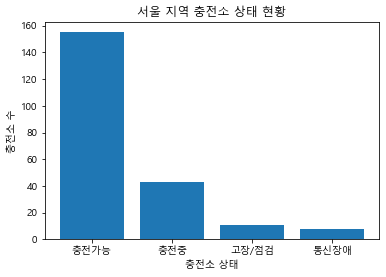

In [44]:
def get_status(area):
    page = 1
    cs_list = []
    while True:
        r = get_root(page, 10, area)
        lis = r.find_all('cpStat')
        if len(lis) == 0:
            break
        for i in lis:
            if i.string == '1':
                cs_list.append('충전가능')
            elif i.string == '2':
                cs_list.append('충전중')
            elif i.string == '3':
                cs_list.append('고장/점검')
            elif i.string == '4':
                cs_list.append('통신장애')
            elif i.string == '5':
                cs_list.append('통신미연결')
            else:
                cs_list.append('알수없음')
        page += 1
    return cs_list

def draw(area):
    cslist = get_status(area)
    s = pd.Series(cslist)
    vc = s.value_counts()
    val = vc.values
    idx = vc.index

    plt.rcParams['font.family']='Malgun Gothic'
    plt.rcParams['axes.unicode_minus']=False
    plt.bar(idx, val)
    
    plt.xlabel('충전소 상태')
    plt.ylabel('충전소 수')
    plt.title(f'{area} 지역 충전소 상태 현황')
    plt.show()
    
draw('서울')

### 3. 충전소 상세 상태 확인

In [42]:
def get_cslist(area):
    page = 1
    cs_list = []

    while True:
        r = get_root(page, 200, area)
        lis = r.find_all('item')
        if len(lis) == 0:
            break
        for i in lis:
            if i.cpStat.string == '1':
                row = [i.csId.string, i.csNm.string, i.cpNm.string, i.addr.string, '충전가능']
            elif i.cpStat.string == '2':
                row = [i.csId.string, i.csNm.string, i.cpNm.string, i.addr.string, '충전중']
            elif i.cpStat.string == '3':
                row = [i.csId.string, i.csNm.string, i.cpNm.string, i.addr.string, '고장/점검']
            elif i.cpStat.string == '4':
                row = [i.csId.string, i.csNm.string, i.cpNm.string, i.addr.string, '통신장애']
            elif i.cpStat.string == '5':
                row = [i.csId.string, i.csNm.string, i.cpNm.string, i.addr.string, '통신미연결']
            else:
                row = [i.csId.string, i.csNm.string, i.cpNm.string, i.addr.string, '알수없음']
            cs_list.append(row)
        page += 1
    return cs_list

def make_df(area):
    lst = get_cslist(area)
    columns = ['ID', '충전소명', '충전기타입', '주소', '상태']
    return pd.DataFrame(lst, columns=columns)


def get_status(area):
    df = make_df(area)
    return df['상태'] 


def draw(area):
    cslist = get_status(area)
    s = pd.Series(cslist)
    vc = s.value_counts()
    val = vc.values
    idx = vc.index

    plt.rcParams['font.family']='Malgun Gothic'
    plt.rcParams['axes.unicode_minus']=False
    plt.bar(idx, val)
    
    plt.xlabel('충전소 상태')
    plt.ylabel('충전소 수')
    plt.title(f'{area} 지역 충전소 상태 현황')
    plt.show()
    


### 리스트에서 선택한 충전소 상세 내역 확인

#### 데이터 형식이 까다로워서 처음부터 데이터 프레임을 다시 만들어서 작업하기로 결정

In [43]:
def get_root(page_no, num_row, area):
    html = requests.get(url+'?pageNo='+str(page_no)+'&numOfRows='+str(num_row)+'&ServiceKey='+key+'&addr='+area).text
    root = BeautifulSoup(html, 'lxml-xml')
    return root

def make_df(area):
    page = 1
    cs_list = []
    
    while True:
        r = get_root(page, 200, area)    
        lis = r.find_all('item')
        if len(lis) == 0:
            break
        for i in lis:
            row = [i.cpId.string, i.csNm.string, i.cpNm.string, i.addr.string, i.cpStat.string]
            cs_list.append(row)
        page += 1
    columns = ['ID', '충전소명', '충전기타입', '주소', '상태']
    return pd.DataFrame(cs_list, columns = columns)

def print_list():
    area = input('검색할 지역명:')
    cs_list, total = get_cs_list(area)
    for i in cs_list:
        for j in i:
            print(j.string)
        print()
    print(f'전체 전기차 충전소 수: {total}개')

def cs_detail():
    page = 1
    cs_list = []

    while True:
        r = get_root(page, 200, '일산')    
        lis = r.find_all('item')
        if len(lis) == 0:
            break
        for i in lis:
            row = [i.csId.string, i.csNm.string, i.cpNm.string, i.addr.string, i.cpStat.string]
            cs_list.append(row)
        page += 1

    df = make_df('경주')
    res = df[df['ID'] == '1360']
    return res
    try:
        res.iloc[0]
    except Exception:
        print('존재하지 않는 충전소')
        
cs_detail()

,ID,충전소명,충전기타입,주소,상태
0,1360,경주지사,급속01,경상북도 경주시 동천동 804 사내주차장 후문 우측,1


## 채팅 예약

In [ ]:
#채팅서버
import socket, threading
members=[]

def sendMsgAll(msg):#인자로 받은 메시지를 채팅방에 있는 모든 사람에 전송
    print('sendMsgAll:', msg)
    for i in members:
        i.sendall(msg.encode(encoding='utf-8'))
            
#쓰레드 작업. 클라이언트 하나당 하나 생성됨. 소켓으로 연결된 클라이언트가 전송한 메시지를 받아서 전체에 전달
def f1(p, soc):
    id = 'member'+str(p)
    msg = id+'님이 입장하셨습니다'
    sendMsgAll(msg)
    
    while True:
        msg = soc.recv(100)
        msg = msg.decode()
        if msg=='/end':
            msg = id+'님이 퇴장하셨습니다'
            soc.sendall('/end'.encode(encoding='utf-8'))
            members.remove(soc)#채팅방에서 제거
            sendMsgAll(msg)
            break
        msg = id+': '+msg
        sendMsgAll(msg)
    
def main():
    host = '172.30.1.17' #서버 주소
    port = 3234             #서버 포트번호

    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    server_socket.bind((host, port))
    server_socket.listen()
    print('chatting server start')
    
    while True:
        client_soc, addr = server_socket.accept()#클라이언트 기다림
        members.append(client_soc)
        print('connected client addr:', addr)
        #쓰레드 생성
        th = threading.Thread(target=f1, args=(addr[1], client_soc))
        th.start()
    
    print('서버 종료')
    server_socket.close()
    
main()

In [ ]:
import socket, threading

soc = None

def sendMsg():
    while True:
        msg = input('msg:')
        soc.sendall(msg.encode(encoding='utf-8'))
        if msg == '/end':
            break


def recvMsg():
    while True:
        data = soc.recv(100)
        msg = data.decode()  # 읽은 데이터 디코딩
        print(msg)
        if msg == '/end':
            break
    soc.close()


def main():
    global soc
    server_ip = '172.30.1.17'
    server_port = 3234

    soc = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    soc.connect((server_ip, server_port))

    th1 = threading.Thread(target=sendMsg)
    th1.start()

    th2 = threading.Thread(target=recvMsg)
    th2.start()


main()

## tkinter gui

In [8]:
import tkinter as tk
import tkinter.ttk

In [23]:
def show():
    print('선택결과')

root = tk.Tk()
root.title('전기차 충전소 현황')
root.geometry('800x600+500+200')
root.resizable(False, False)

label = tk.Label(root, text='지역별 충전소 현황 검색', height=4)
label.pack(side='top')

listbox = tk.Listbox(root, width=40, height=20, justify='center')
for i in range(0, len(df['충전소명'])):
    listbox.insert(i, df['충전소명'][i])

listbox.bind('<Double-1>', show)
listbox.place(x=20, y=80)

label1 = tk.Label(root, text='충전소명\n충전기타입\n주소\n상태', justify='left')
label1.place(x=320, y=80)


root.mainloop()